In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import openpyxl

# Replace 'path/to/Online Retail.xlsx' with the path to your Excel file
# df = pd.read_excel('Online Retail.xlsx')
df = pd.read_excel('Online Retail.xlsx', nrows=20000)




Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:

print(df.head())  # Display the first few rows of the DataFrame
print(df.shape)  # Display the shape of the DataFrame as (number of rows, number of columns)



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
(20000, 8)


In [3]:

# Display the summary statistics for the numerical columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20000 non-null  object        
 1   StockCode    20000 non-null  object        
 2   Description  19929 non-null  object        
 3   Quantity     20000 non-null  int64         
 4   InvoiceDate  20000 non-null  datetime64[ns]
 5   UnitPrice    20000 non-null  float64       
 6   CustomerID   13347 non-null  float64       
 7   Country      20000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.2+ MB
None


In [4]:
# Display the number of missing values in each column
print("Display the number of missing values in each column")
print(df.isnull().sum())

#

Display the number of missing values in each column
InvoiceNo         0
StockCode         0
Description      71
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6653
Country           0
dtype: int64


In [5]:
df = df.drop(columns=['Description', 'CustomerID'])



In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,20000.000000,20000,20000.000000
mean,7.765900,2010-12-05 08:52:38.892000,7.645127
min,-9360.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2010-12-02 18:08:00,1.280000
50%,2.000000,2010-12-05 16:24:00,2.510000
75%,6.000000,2010-12-07 15:03:00,4.250000
max,2880.000000,2010-12-09 11:45:00,13541.330000
std,78.161685,NaN,201.902686


In [7]:
#  Handle missing values (choose one of the methods below)
# Drop rows with missing values
df = df.dropna()

# OR fill missing values with a specific value (e.g., mean)
# df = df.fillna(df.mean())

# Remove redundant or unnecessary columns
# Example: Drop columns 'Column1' and 'Column2'
# df = df.drop(columns=['Column1', 'Column2'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20000 non-null  object        
 1   StockCode    20000 non-null  object        
 2   Quantity     20000 non-null  int64         
 3   InvoiceDate  20000 non-null  datetime64[ns]
 4   UnitPrice    20000 non-null  float64       
 5   Country      20000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 937.6+ KB


In [9]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Display summary statistics for numerical columns
print("Summary statistics:")
print(numerical_df.describe())

# Mean of each numerical column
print("\nMean of each column:")
print(numerical_df.mean())

# Median of each numerical column
print("\nMedian of each column:")
print(numerical_df.median())

# Standard deviation of each numerical column
print("\nStandard deviation of each column:")
print(numerical_df.std())

# Variance of each numerical column
print("\nVariance of each column:")
print(numerical_df.var())

Summary statistics:
           Quantity     UnitPrice
count  20000.000000  20000.000000
mean       7.765900      7.645127
std       78.161685    201.902686
min    -9360.000000      0.000000
25%        1.000000      1.280000
50%        2.000000      2.510000
75%        6.000000      4.250000
max     2880.000000  13541.330000

Mean of each column:
Quantity     7.765900
UnitPrice    7.645127
dtype: float64

Median of each column:
Quantity     2.00
UnitPrice    2.51
dtype: float64

Standard deviation of each column:
Quantity      78.161685
UnitPrice    201.902686
dtype: float64

Variance of each column:
Quantity      6109.248960
UnitPrice    40764.694715
dtype: float64


In [15]:
# Get the ten rows with the smallest values in the Quantity column
min_quantity_rows = df.nsmallest(10, 'Quantity')

# Display the result
print(min_quantity_rows)

      InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
4287    C536757     84347     -9360 2010-12-02 14:23:00       0.03   
7292     537028     21696      -320 2010-12-03 16:36:00       0.00   
19996    537999     22034      -223 2010-12-09 11:44:00       0.00   
4854    C536812     22574      -192 2010-12-02 16:58:00       0.72   
4857    C536812     22588      -192 2010-12-02 16:58:00       2.10   
4855    C536812     22593      -144 2010-12-02 16:58:00       0.72   
4856    C536812     22595      -144 2010-12-02 16:58:00       0.72   
4858    C536812     22130      -144 2010-12-02 16:58:00       0.72   
7291     537027    18098C      -140 2010-12-03 16:36:00       0.00   
7198     537006     21648      -130 2010-12-03 15:36:00       0.00   

              Country  
4287   United Kingdom  
7292   United Kingdom  
19996  United Kingdom  
4854   United Kingdom  
4857   United Kingdom  
4855   United Kingdom  
4856   United Kingdom  
4858   United Kingdom  
7291   United

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:

# Set the style for the plots
#sns.set(style="whitegrid")

# Histograms for each numerical column to show the distribution of values.
#for column in numerical_df.columns:
 #   plt.figure(figsize=(10, 6))
  #  sns.histplot(numerical_df[column], kde=True)
   # plt.title(f'Histogram of {column}')
    #plt.xlabel(column)
    #plt.ylabel('Frequency')
    #plt.show()





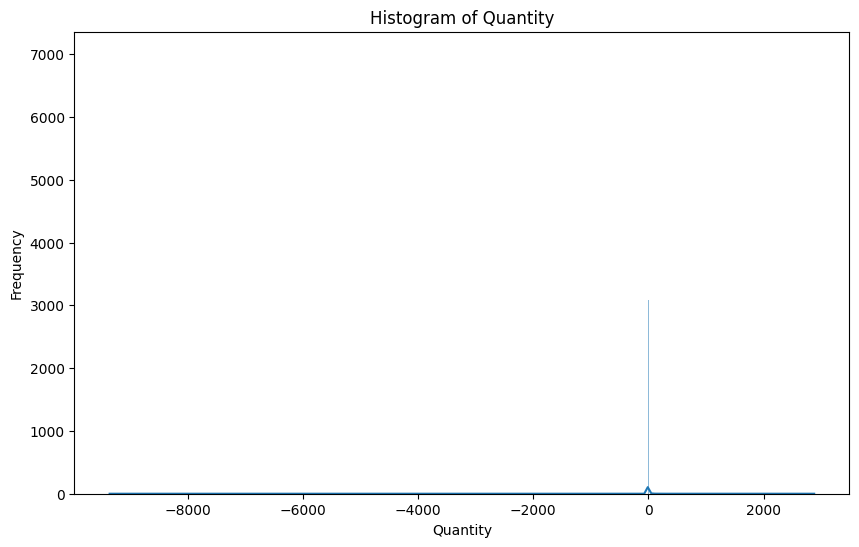

In [13]:
# Histogram for Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], kde=True)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [18]:
# Calculate mean and standard deviation
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()

# Filter data within two standard deviations
filtered_df = df[(df['Quantity'] >= mean_quantity - 1 * std_quantity) & 
                 (df['Quantity'] <= mean_quantity + 1 * std_quantity)]

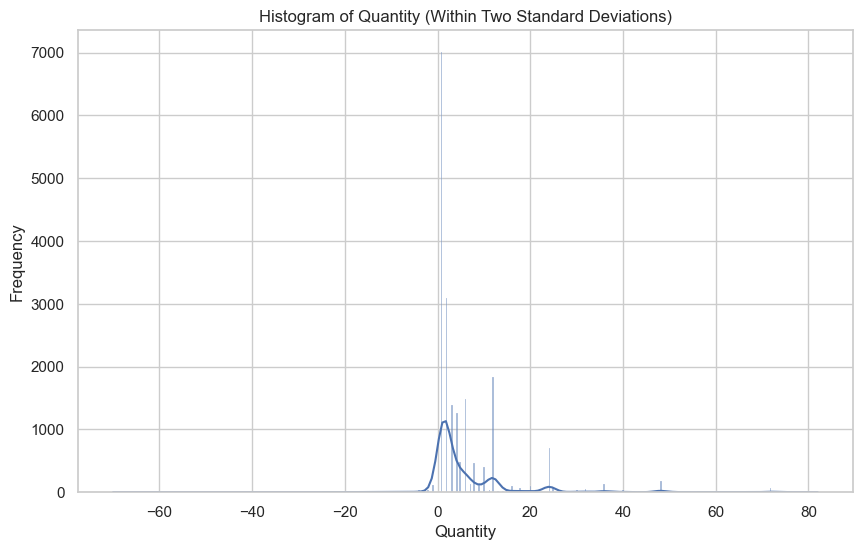

In [19]:

sns.set(style="whitegrid")

# Histogram for Quantity within two standard deviations
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Quantity'], kde=True)
plt.title('Histogram of Quantity (Within Two Standard Deviations)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

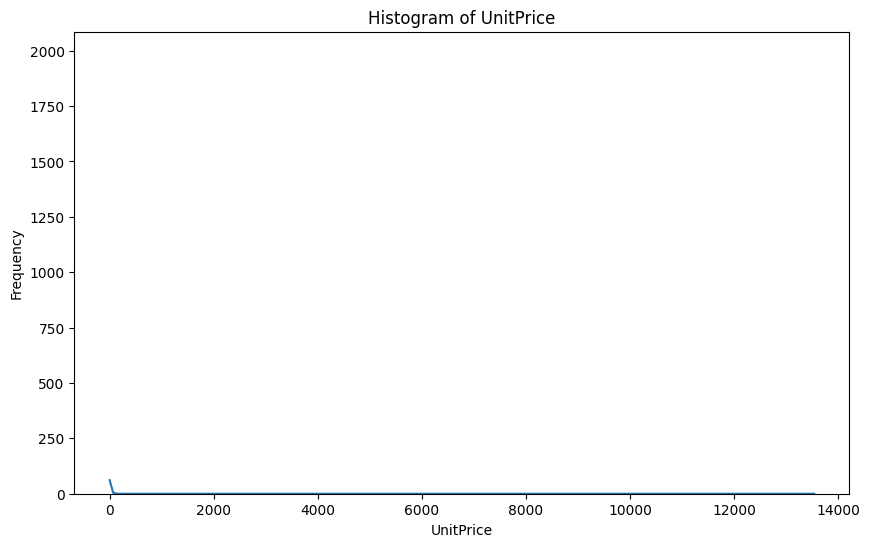

In [14]:

# Histogram for UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], kde=True)
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate mean and standard deviation
mean_unitprice = df['UnitPrice'].mean()
std_unitprice = df['UnitPrice'].std()

# Filter data within two standard deviations
filtered_df = df[(df['UnitPrice'] >= mean_unitprice - 2 * std_unitprice) & 
                 (df['UnitPrice'] <= mean_unitprice + 2 * std_unitprice)]

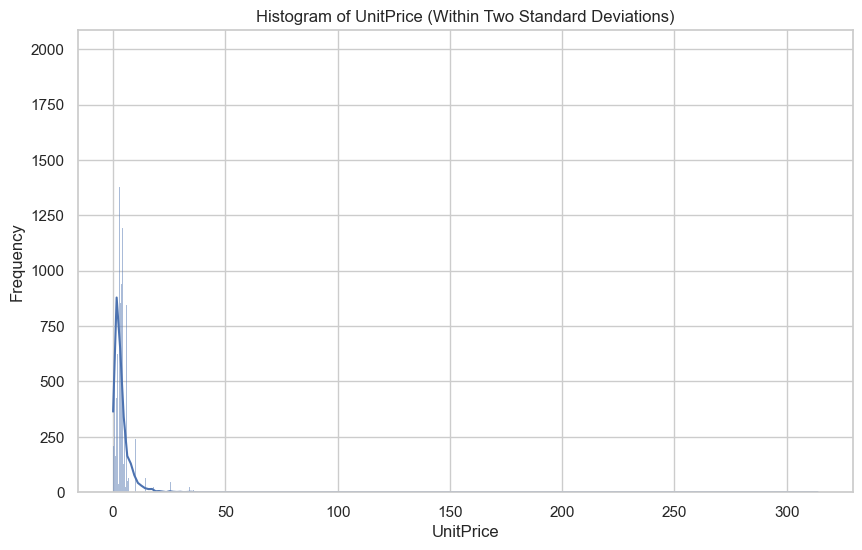

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histogram for UnitPrice within two standard deviations
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['UnitPrice'], kde=True)
plt.title('Histogram of UnitPrice (Within Two Standard Deviations)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

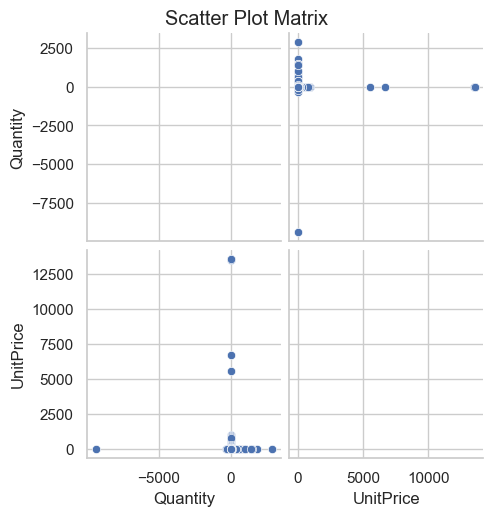

In [22]:
# Scatter Plot Matrix (pair plot) to visualize relationships between pairs of numerical columns.
if len(numerical_df.columns) > 1:
    sns.pairplot(numerical_df)
    plt.suptitle('Scatter Plot Matrix', y=1.02)
    plt.show()

In [25]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Function to filter outliers using the IQR method
def filter_outliers_iqr(df):
    Q1 = df.quantile(0.1)
    Q3 = df.quantile(0.9)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Filter outliers using the IQR method
filtered_numerical_df = filter_outliers_iqr(numerical_df)

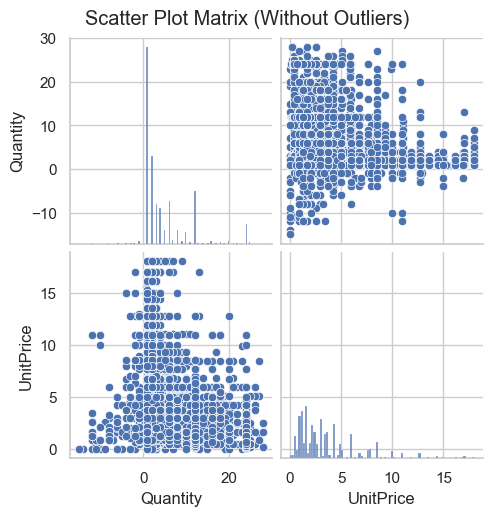

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatter Plot Matrix (pair plot) to visualize relationships between pairs of numerical columns
if len(filtered_numerical_df.columns) > 1:
    sns.pairplot(filtered_numerical_df)
    plt.suptitle('Scatter Plot Matrix (Without Outliers)', y=1.02)
    plt.show()

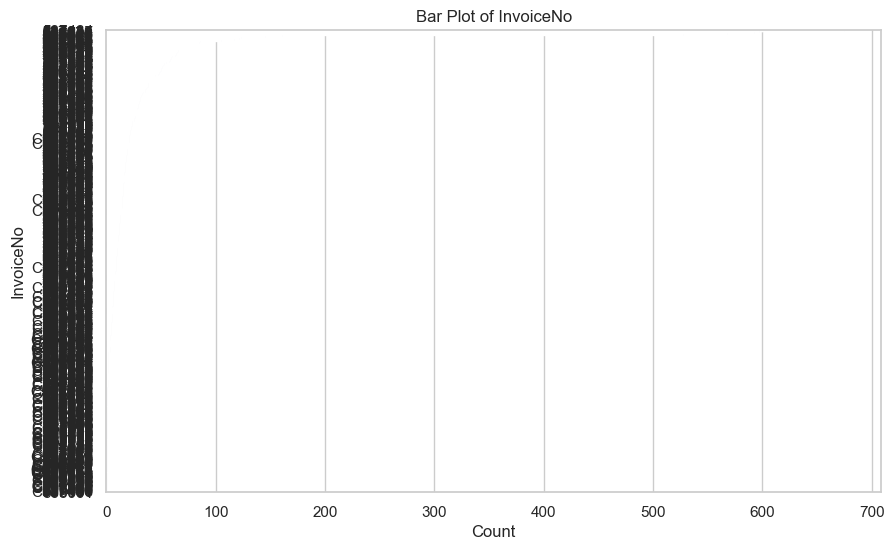

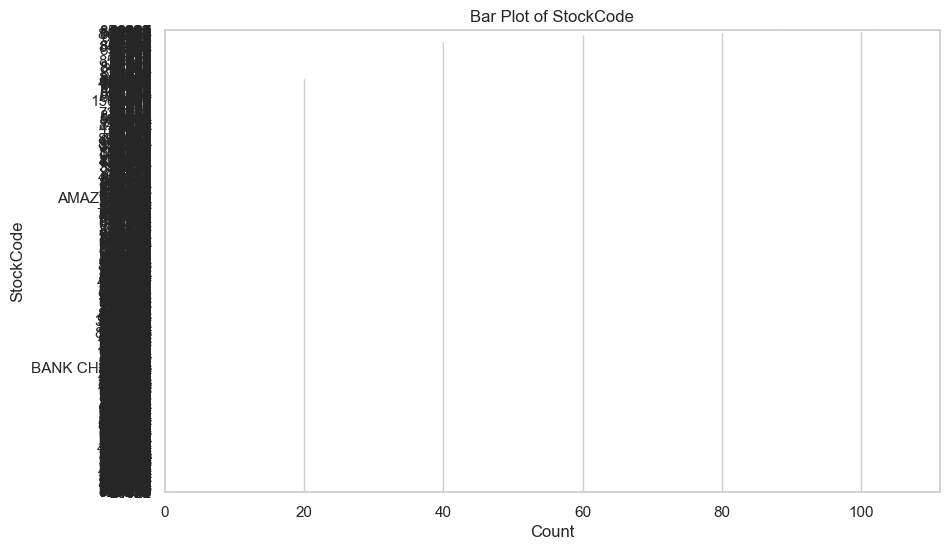

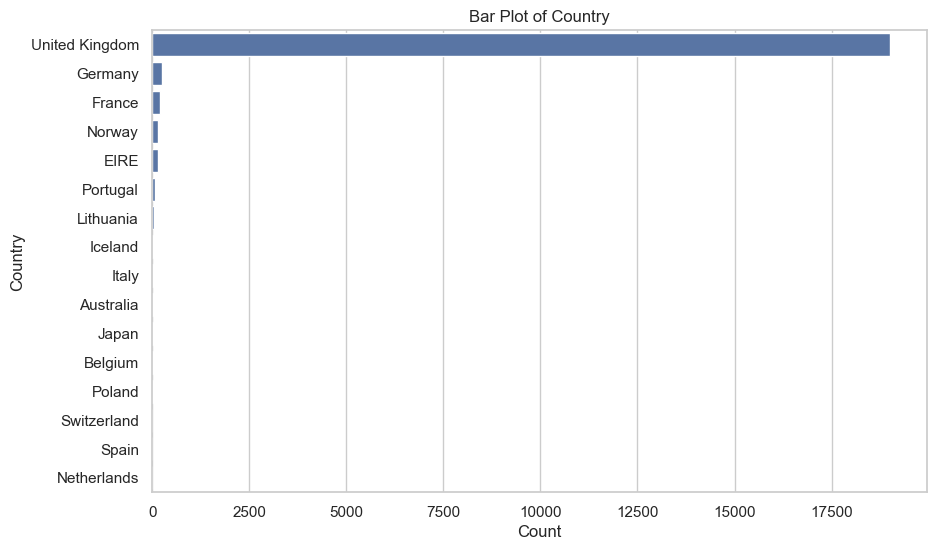

In [28]:
# BBar Plots for each categorical column to show the count of each category.
categorical_df = df.select_dtypes(include=['object'])
for column in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=categorical_df, order=categorical_df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

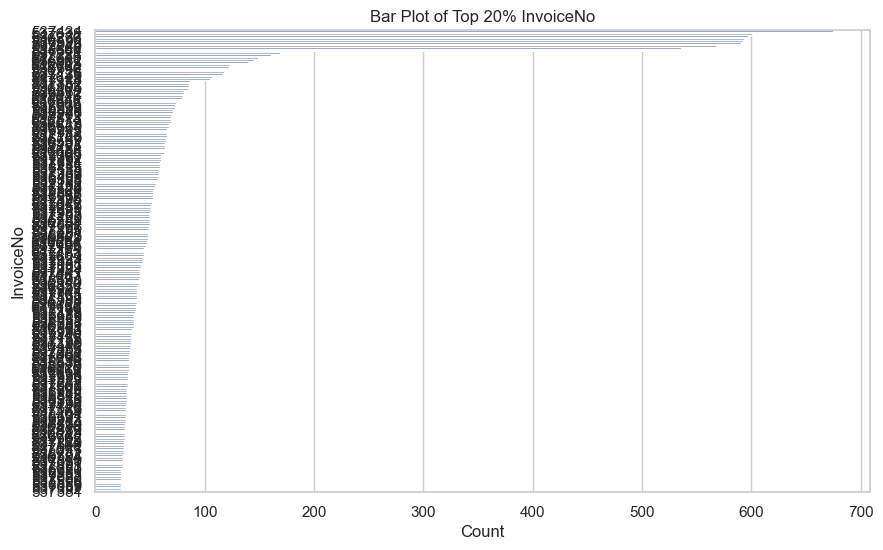

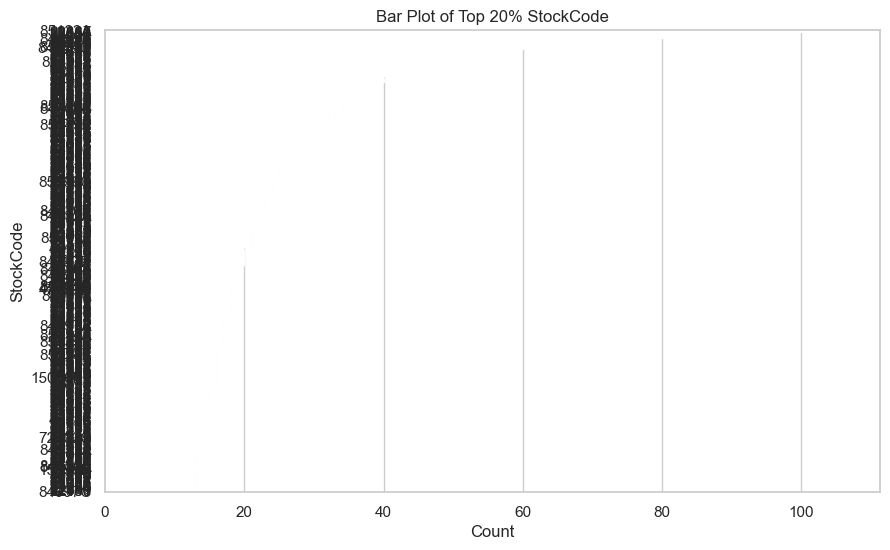

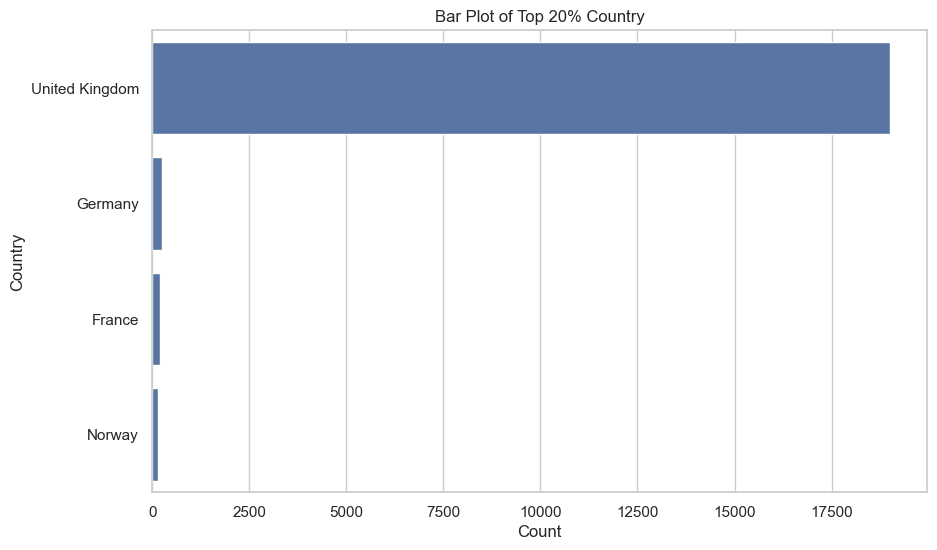

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Select only categorical columns
categorical_df = df.select_dtypes(include=['object'])

for column in categorical_df.columns:
    # Calculate the value counts for the column
    value_counts = categorical_df[column].value_counts()

    # Determine the threshold for the top 20% of categories
    threshold = value_counts.quantile(0.80)

    # Filter the categories to include only the top 20%
    top_categories = value_counts[value_counts >= threshold].index

    # Filter the DataFrame to include only the top categories
    filtered_df = categorical_df[categorical_df[column].isin(top_categories)]

    # Plot the bar plot for the top categories
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=filtered_df, order=top_categories)
    plt.title(f'Bar Plot of Top 20% {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

To analyze sales trends over time and identify the busiest months and days of the week in terms of sales, you can follow these steps:


In [30]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    20000 non-null  object        
 1   StockCode    20000 non-null  object        
 2   Quantity     20000 non-null  int64         
 3   InvoiceDate  20000 non-null  datetime64[ns]
 4   UnitPrice    20000 non-null  float64       
 5   Country      20000 non-null  object        
 6   Month        20000 non-null  int32         
 7   DayOfWeek    20000 non-null  int32         
 8   Sales        20000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 1.2+ MB


In [3]:
df_all = pd.read_excel("Online Retail.xlsx")    

In [5]:
df_all['Month'] = df_all['InvoiceDate'].dt.month
df_all['DayOfWeek'] = df_all['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

In [6]:
df_all['Sales'] = df_all['Quantity'] * df['UnitPrice']

In [10]:
df_all.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,DayOfWeek,Sales
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,20000.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,7.553128,2.431277,16.980199
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,1.000000,0.000000,-13541.330000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,5.000000,1.000000,3.320000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,8.000000,2.000000,8.250000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,11.000000,4.000000,17.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,6.000000,13541.330000
std,218.081158,NaN,96.759853,1713.600303,3.509055,1.844709,216.610533


In [7]:
# Group by month and sum sales
monthly_sales = df_all.groupby('Month')['Sales'].sum()

# Group by day of the week and sum sales
weekly_sales = df_all.groupby('DayOfWeek')['Sales'].sum()

In [13]:
# Check unique months and their counts
unique_months = df_all['Month'].value_counts().sort_index()
print(unique_months)

# Check the range of InvoiceDate
date_range = df_all['InvoiceDate'].min(), df_all['InvoiceDate'].max()
print("Date range:", date_range)

Month
1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
12    68006
Name: count, dtype: int64
Date range: (Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))


/var/folders/44/yc0m3m456b51nyzwyfjptgm40000gn/T/ipykernel_17258/1722845415.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


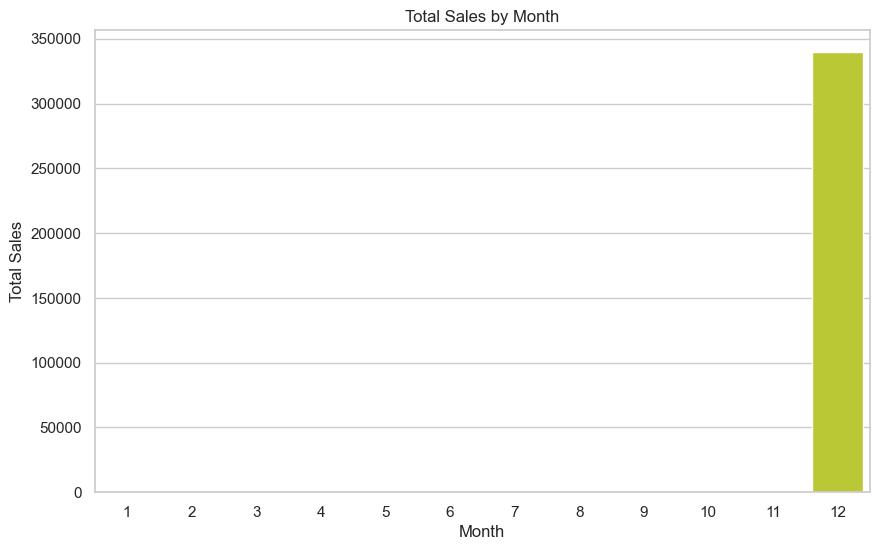

/var/folders/44/yc0m3m456b51nyzwyfjptgm40000gn/T/ipykernel_17258/1722845415.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="viridis")


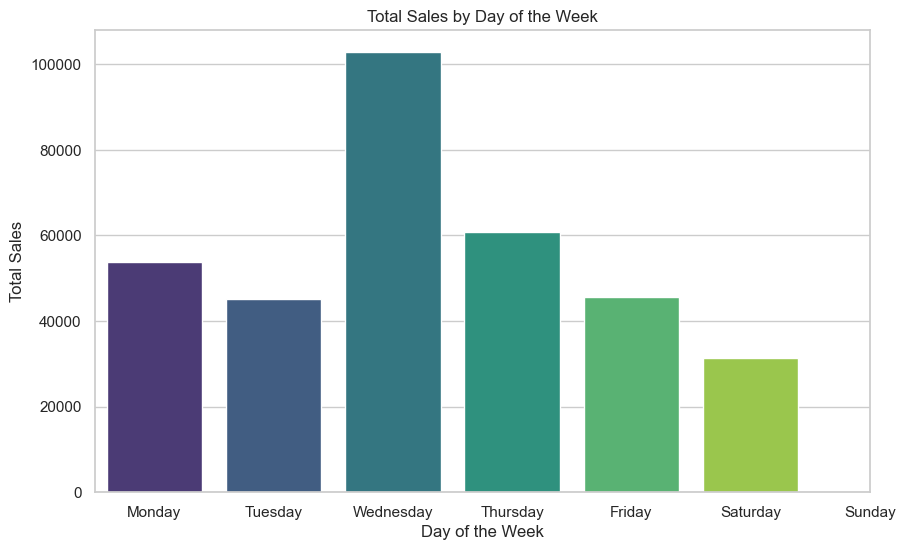

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Plot weekly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette="viridis")
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

In [15]:

# Assuming your DataFrame is named df
# Convert InvoiceDate to datetime if not already done
df_all['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year and Month from InvoiceDate
df_all['Year'] = df_all['InvoiceDate'].dt.year
df_all['Month'] = df_all['InvoiceDate'].dt.month



In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to NaT
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
 7   Month        20000 non-null   float64
 8   DayOfWeek    541909 non-null  int32  
 9   Sales        20000 non-null   float64
 10  Year         20000 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 47.5+ MB


In [23]:
# Assuming your DataFrame is named df_all
# Convert InvoiceDate to datetime if not already done
df_all['InvoiceDate'] = pd.to_datetime(df_all['InvoiceDate'])

# Set InvoiceDate as the index
df_all.set_index('InvoiceDate', inplace=True)

# Group by week and sum the Sales
weekly_sales = df_all.resample('W')['Sales'].sum().reset_index()

# Rename the columns for clarity
weekly_sales.columns = ['Week', 'Total_Sales']

# Sort the results by week
weekly_sales.sort_values(by='Week', inplace=True)

# Print the aggregated weekly sales
print(weekly_sales)




KeyError: 'InvoiceDate'

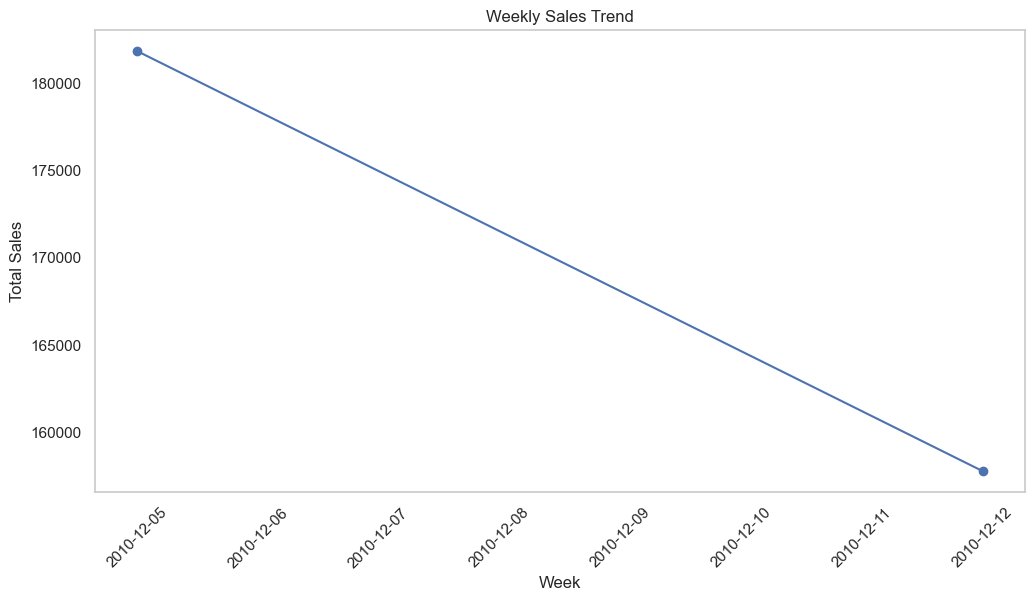

In [21]:
# Optionally, plot the weekly sales trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.grid()
plt.show()

In [24]:
import pandas as pd

# Assuming your DataFrame is named df_all
# Ensure that the Quantity column is in the correct format
df_all['Quantity'] = df_all['Quantity'].astype(int)

# 1. Top-selling products based on quantity sold
top_products = df_all.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)  # Get top 10 products

print("Top Selling Products:")
print(top_products)

# 2. Top-selling countries based on quantity sold
top_countries = df_all.groupby('Country')['Quantity'].sum().reset_index()
top_countries = top_countries.sort_values(by='Quantity', ascending=False).head(10)  # Get top 10 countries

print("\nTop Selling Countries:")
print(top_countries)

Top Selling Products:
     StockCode                         Description  Quantity
3171     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
4360    85099B             JUMBO BAG RED RETROSPOT     47363
3291     84879       ASSORTED COLOUR BIRD ORNAMENT     36381
1243     22197                      POPCORN HOLDER     36334
441      21212     PACK OF 72 RETROSPOT CAKE CASES     36039
4373    85123A  WHITE HANGING HEART T-LIGHT HOLDER     35025
2254     23084                  RABBIT NIGHT LIGHT     30680
1540     22492             MINI PAINT SET VINTAGE      26437
1685     22616          PACK OF 12 LONDON TISSUES      26315
1032     21977  PACK OF 60 PINK PAISLEY CAKE CASES     24753

Top Selling Countries:
           Country  Quantity
36  United Kingdom   4263829
24     Netherlands    200128
10            EIRE    142637
14         Germany    117448
13          France    110480
0        Australia     83653
32          Sweden     35637
33     Switzerland     30325
31           Spain    

Duplicate Rows:
                    InvoiceNo StockCode                        Description  \
InvoiceDate                                                                  
2010-12-01 11:45:00    536409     21866        UNION JACK FLAG LUGGAGE TAG   
2010-12-01 11:45:00    536409     22866      HAND WARMER SCOTTY DOG DESIGN   
2010-12-01 11:45:00    536409     22900    SET 2 TEA TOWELS I LOVE LONDON    
2010-12-01 11:45:00    536409     22111       SCOTTIE DOG HOT WATER BOTTLE   
2010-12-01 11:49:00    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS   
...                       ...       ...                                ...   
NaT                    581538     22068        BLACK PIRATE TREASURE CHEST   
NaT                    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS   
NaT                    581538     22992             REVOLVER WOODEN RULER    
NaT                    581538     22694                       WICKER STAR    
NaT                    581538     23343       JU

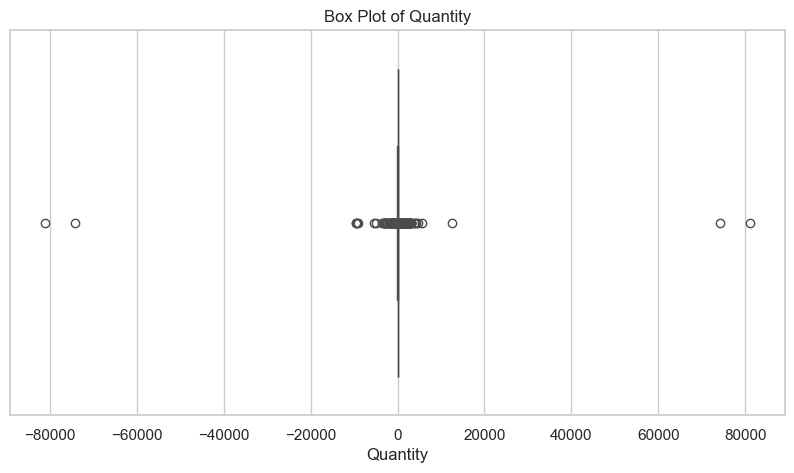

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_all

# Check for duplicates in the DataFrame
duplicates = df_all[df_all.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Optionally, drop duplicates if they are not needed
# df_all = df_all.drop_duplicates()

# Reset the index if necessary
df_all.reset_index(drop=True, inplace=True)

# 1. Visual Inspection using Box Plot for Quantity
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all['Quantity'])
plt.title('Box Plot of Quantity')
plt.show()



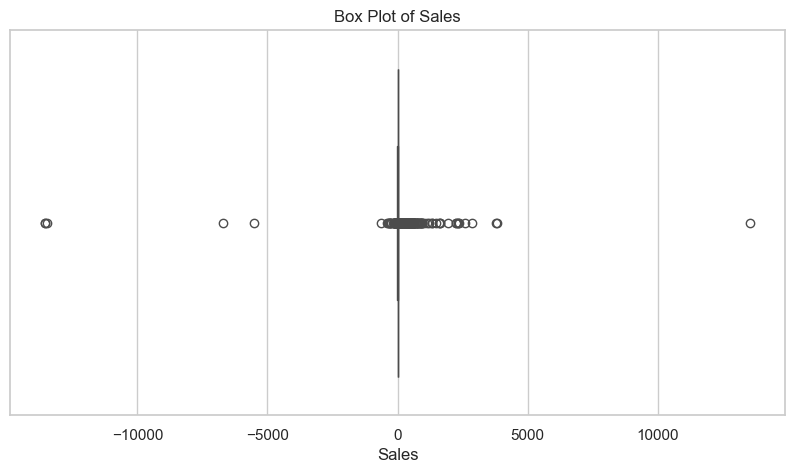

In [28]:
# 2. Visual Inspection using Box Plot for Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_all['Sales'])
plt.title('Box Plot of Sales')
plt.show()



In [29]:
# 3. Identify outliers using IQR for Quantity
Q1 = df_all['Quantity'].quantile(0.25)
Q3 = df_all['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

quantity_outliers = df_all[(df_all['Quantity'] < lower_bound) | (df_all['Quantity'] > upper_bound)]
print("Outliers in Quantity:")
print(quantity_outliers)



Outliers in Quantity:
       InvoiceNo StockCode                         Description  Quantity  \
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
26        536370     22728           ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727           ALARM CLOCK BAKELIKE RED         24   
30        536370     21883                    STARS GIFT TAPE         24   
31        536370     10002         INFLATABLE POLITICAL GLOBE         48   
...          ...       ...                                 ...       ...   
541876    581585     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541882    581585     21916     SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692         BOX OF 24 COCKTAIL PARASOLS        25   
541891    581586     23275    SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217       RED RETROSPOT ROUND CAKE TINS        24   

        UnitPrice  CustomerID         Country  Month  DayOfWeek  

In [30]:
# 4. Identify outliers using IQR for Sales
Q1_sales = df_all['Sales'].quantile(0.25)
Q3_sales = df_all['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

sales_outliers = df_all[(df_all['Sales'] < lower_bound_sales) | (df_all['Sales'] > upper_bound_sales)]
print("\nOutliers in Sales:")
print(sales_outliers)


Outliers in Sales:
      InvoiceNo StockCode                       Description  Quantity  \
9        536367     84879     ASSORTED COLOUR BIRD ORNAMENT        32   
26       536370     22728         ALARM CLOCK BAKELIKE PINK        24   
27       536370     22727         ALARM CLOCK BAKELIKE RED         24   
28       536370     22726        ALARM CLOCK BAKELIKE GREEN        12   
31       536370     10002       INFLATABLE POLITICAL GLOBE         48   
...         ...       ...                               ...       ...   
19982    537981     21190         PINK HEARTS PAPER GARLAND       110   
19984    537995     22171  3 HOOK PHOTO SHELF ANTIQUE WHITE         8   
19993    537995     20702                PINK PADDED MOBILE        12   
19997    538000     22942       CHRISTMAS LIGHTS 10 SANTAS          5   
19998    538000     79321                     CHILLI LIGHTS        12   

       UnitPrice  CustomerID         Country  Month  DayOfWeek   Sales    Year  
9           1.69     1